In [ ]:
import numpy as np
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DGdataset/Sample Time Series/hourly/classification_attempt_1.csv' , index_col = 0)
df.head()

,Sample Index,Mean,Variance,Skewness,Kurtosis,Trend Mean,Seasonal Mean,Residual Mean,Best Model
0,0,526.697948,1580.179445,1.752512,6.446002,527.833336,0.040769,-1.176157,ETS
1,1,531.107493,2087.632395,1.920251,5.939047,529.340228,0.987871,0.779393,ARIMA
2,2,534.096876,2097.448578,1.674601,4.921075,532.137554,1.271351,0.687971,ARIMA
3,3,535.898369,2044.734436,1.556184,4.614765,535.829758,0.482107,-0.413497,ARIMA
4,4,536.418059,1960.844482,1.541476,4.744824,538.980866,0.110815,-2.673621,ARIMA


In [ ]:
df.drop('Sample Index' , axis = 1 , inplace = True)

<Axes: >

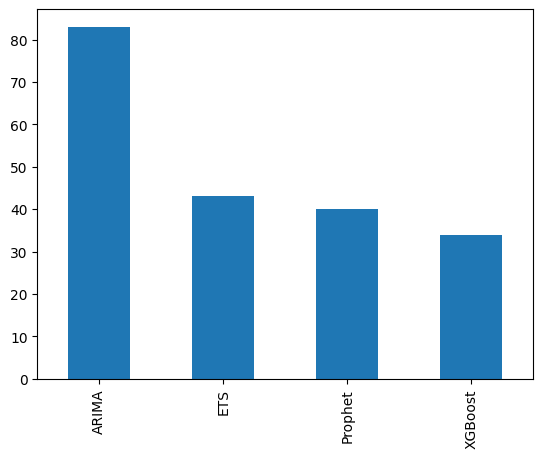

In [ ]:
df["Best Model"].value_counts().plot(kind="bar")

In [ ]:
method_to_label = {'ARIMA': 0, 'XGBoost': 1, 'Prophet': 2, 'ETS': 3}
df['model'] = df['Best Model'].map(method_to_label)

In [ ]:
corr_matrix

,Mean,Variance,Skewness,Kurtosis,Trend Mean,Seasonal Mean,Residual Mean,model
Mean,1.000000,-0.838687,-0.184794,0.820731,0.999996,-0.705709,0.230139,0.275719
Variance,-0.838687,1.000000,-0.271323,-0.948886,-0.838728,0.658803,-0.234572,-0.293234
Skewness,-0.184794,-0.271323,1.000000,0.095276,-0.184534,-0.023602,0.002885,-0.088828
Kurtosis,0.820731,-0.948886,0.095276,1.000000,0.820633,-0.644850,0.273426,0.358911
Trend Mean,0.999996,-0.838728,-0.184534,0.820633,1.000000,-0.706226,0.227811,0.276145
Seasonal Mean,-0.705709,0.658803,-0.023602,-0.644850,-0.706226,1.000000,-0.414398,-0.262995
Residual Mean,0.230139,-0.234572,0.002885,0.273426,0.227811,-0.414398,1.000000,-0.015290
model,0.275719,-0.293234,-0.088828,0.358911,0.276145,-0.262995,-0.015290,1.000000


In [ ]:
df.head()

,Mean,Variance,Kurtosis,Trend Mean,Seasonal Mean,Residual Mean,Best Model,model
0,1.170354e+06,4.007895e+10,3.071583,1.170865e+06,-3.686601e+03,3176.103442,Prophet,2
1,1.173173e+06,4.021102e+10,2.854922,1.173717e+06,-4.948876e+02,-48.892901,ARIMA,0
2,1.165945e+06,4.167459e+10,2.653146,1.170509e+06,-2.861151e+03,-1702.486047,ETS,3
3,1.161884e+06,4.173290e+10,2.661183,1.162507e+06,1.455192e-11,-623.829597,XGBoost,1
4,1.154895e+06,4.314659e+10,2.477578,1.153841e+06,-1.812498e+03,2866.969396,ARIMA,0


In [ ]:
df.tail()

,Mean,Variance,Kurtosis,Trend Mean,Seasonal Mean,Residual Mean,Best Model,model
195,439600.023316,1.932588e+11,-0.340374,439964.297210,-1.362506e+01,-350.648835,ARIMA,0
196,439580.920993,1.924795e+11,-0.329830,439345.646991,-2.278368e+01,258.057679,ARIMA,0
197,438877.345837,1.918428e+11,-0.316556,439316.425772,-1.588179e+01,-423.198141,XGBoost,1
198,438961.104406,1.910553e+11,-0.306385,439383.515559,-2.022823e+00,-420.388329,XGBoost,1
199,437816.498893,1.906591e+11,-0.294135,438657.270709,-1.049417e-13,-840.771815,ETS,3


In [ ]:
df.drop('Skewness' , axis = 1 , inplace = True)

In [ ]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
import numpy as np
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
path_map = {
    "daily" : "/content/drive/MyDrive/DGdataset/Sample Time Series/daily/classification_attempt_6.csv" ,
    "hourly" : "/content/drive/MyDrive/DGdataset/Sample Time Series/hourly/classification_attempt_1.csv" ,
    "monthly" : "/content/drive/MyDrive/DGdataset/Sample Time Series/monthly/classification_attempt_1.csv" ,
    "weekly" : "/content/drive/MyDrive/DGdataset/Sample Time Series/weekly/classification_attempt_1.csv" ,
}

attempt = 7

for format,path in path_map.items():
  df = pd.read_csv(path , index_col = 0)
  df.drop(columns = ['Sample Index' , 'Skewness'] , axis = 1 , inplace = True)

  method_to_label = {'ARIMA': 0, 'XGBoost': 1, 'Prophet': 2, 'ETS': 3}
  df['model'] = df['Best Model'].map(method_to_label)

  if format == "daily":
    under_sample = {
        0: 25 ,
        1:25
    }
    over_sample = {
        3: 25 ,
        2 : 25
    }
  elif format == "hourly":

    corr_matrix = df.corr()
    high_corr_features = set()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > 0.7:
                colname = corr_matrix.columns[i]
                high_corr_features.add(colname)
    df.drop(columns=high_corr_features , inplace = True)

    under_sample = {
        0 : 30,
        3 : 30,
        2 : 30,
        1 : 30

    }
    over_sample = {

    }
  elif format == "monthly":
    under_sample = {
        0: 25 ,
        1: 25
    }
    over_sample ={
        3 : 25 ,
        2 : 25
    }
  elif format == "weekly":
    df.drop(columns = ['Seasonal Mean' , 'Residual Mean'] , axis = 1 , inplace = True)
    under_sample = {
        1: 25
    }
    over_sample ={
        3 : 25 ,
        2 : 25,
        0 : 25
    }

  X = df.drop(['model', 'Best Model'], axis=1)
  y = df['model']

  print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
  print("Format" , format , df.columns)
  print("Class distribution before undersampling:")
  print(Counter(y))

  # Initialize the RandomUnderSampler with desired sampling strategy
  undersampler = RandomUnderSampler(sampling_strategy=under_sample, random_state=40)
  X_resampled, y_resampled = undersampler.fit_resample(X, y)

  print("Class distribution after undersampling:")
  print(Counter(y_resampled))

  # Initialize the RandomOverSampler with desired sampling strategy
  oversampler = RandomOverSampler(sampling_strategy=over_sample, random_state=42)
  X_resampled, y_resampled = oversampler.fit_resample(X_resampled, y_resampled)

  print("Class distribution after upsampling:")
  print(Counter(y_resampled))
  print()



  X = X_resampled
  y = y_resampled
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

  classifiers = {
    'RandomForest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [100, 200, 300, 500],
            'max_depth': [10, 20, 30],
            # 'min_samples_split': [2, 5, 10],
            # 'min_samples_leaf': [1, 2, 4],
        }
    }
  }

  results = {}
  for classifier_name, classifier_info in classifiers.items():
      clf = classifier_info['model']
      param_grid = classifier_info['params']

      grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy')
      grid_search.fit(X_train, y_train)

      best_params = grid_search.best_params_
      best_model = grid_search.best_estimator_
      y_pred = best_model.predict(X_test)

      accuracy = accuracy_score(y_test, y_pred)


      store_path = '/content/drive/MyDrive/DGdataset/Sample Time Series/model/'+classifier_name+str(accuracy)+format+str(attempt)+".pkl"
      with open(store_path, 'wb') as model_file:
          pickle.dump(best_model, model_file)


      classification_rep = classification_report(y_test, y_pred, output_dict=True)
      results[classifier_name] = {
          'best_params': best_params,
          'classification_report': classification_rep
      }

  # Print the results for each classifier
  for classifier_name, result in results.items():
      print(f"Classifier: {classifier_name}")
      print(f"Best Parameters: {result['best_params']}")
      print("Classification Report:")
      print(pd.DataFrame.from_dict(result['classification_report']).T)
      print()



  print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
  print()

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Format daily Index(['Mean', 'Variance', 'Kurtosis', 'Trend Mean', 'Seasonal Mean',
       'Residual Mean', 'Best Model', 'model'],
      dtype='object')
Class distribution before undersampling:
Counter({0: 140, 1: 35, 3: 14, 2: 11})
Class distribution after undersampling:
Counter({0: 25, 1: 25, 3: 14, 2: 11})
Class distribution after upsampling:
Counter({0: 25, 1: 25, 2: 25, 3: 25})

Classifier: RandomForest
Best Parameters: {'max_depth': 10, 'n_estimators': 200}
Classification Report:
              precision    recall  f1-score  support
0              0.666667  0.666667  0.666667      6.0
1              0.500000  0.333333  0.400000      6.0
2              0.625000  1.000000  0.769231      5.0
3              0.500000  0.333333  0.400000      3.0
accuracy       0.600000  0.600000  0.600000      0.6
macro avg      0.572917  0.583333  0.558974     20.0
weighted avg   0.581250  0.600000  0.572308     20.0

+++++++++

<ipython-input-18-6836f75f74d6>:28: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


Classifier: RandomForest
Best Parameters: {'max_depth': 20, 'n_estimators': 200}
Classification Report:
              precision    recall  f1-score  support
0              0.400000  0.333333  0.363636     6.00
1              0.285714  0.285714  0.285714     7.00
2              0.333333  0.142857  0.200000     7.00
3              0.111111  0.250000  0.153846     4.00
accuracy       0.250000  0.250000  0.250000     0.25
macro avg      0.282540  0.252976  0.250799    24.00
weighted avg   0.299074  0.250000  0.258217    24.00

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Format monthly Index(['Mean', 'Variance', 'Kurtosis', 'Trend Mean', 'Seasonal Mean',
       'Residual Mean', 'Best Model', 'model'],
      dtype='object')
Class distribution before undersampling:
Counter({1: 36, 0: 30, 3: 23, 2: 11})
Class distribution after undersampling:
Counter({0: 25, 1: 25, 3: 23, 2: 11})
Class di

In [ ]:
path_map = {
    "daily" : "/content/drive/MyDrive/DGdataset/Sample Time Series/daily/classification_attempt_6.csv" ,
    "hourly" : "/content/drive/MyDrive/DGdataset/Sample Time Series/hourly/classification_attempt_1.csv" ,
    "monthly" : "/content/drive/MyDrive/DGdataset/Sample Time Series/monthly/classification_attempt_1.csv" ,
    "weekly" : "/content/drive/MyDrive/DGdataset/Sample Time Series/weekly/classification_attempt_1.csv" ,
}

frames = []
for format,path in path_map.items():

  df = pd.read_csv(path , index_col = 0)
  frames.append(df)

combined_df = pd.concat(frames)
combined_df.drop(columns = ['Sample Index' , 'Skewness'] , axis = 1 , inplace = True)
combined_df.reset_index(inplace=True , drop=True)

method_to_label = {'ARIMA': 0, 'XGBoost': 1, 'Prophet': 2, 'ETS': 3}
combined_df['model'] = combined_df['Best Model'].map(method_to_label)

X = combined_df.drop(['model', 'Best Model'], axis=1)
y = combined_df['model']

print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
print("Format" , combined_df.columns)
print("Class distribution before undersampling:")
print(Counter(y))

# Initialize the RandomUnderSampler with desired sampling strategy
undersampler = RandomUnderSampler(sampling_strategy={ 0 : 100 , 1 : 100 }, random_state=40)
X_resampled, y_resampled = undersampler.fit_resample(X, y)

print("Class distribution after undersampling:")
print(Counter(y_resampled))

# Initialize the RandomOverSampler with desired sampling strategy
oversampler = RandomOverSampler(sampling_strategy={ 2 : 100 , 3 : 100 }, random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X_resampled, y_resampled)

print("Class distribution after upsampling:")
print(Counter(y_resampled))
print()


X = X_resampled
y = y_resampled
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

classifiers = {
  'RandomForest': {
      'model': RandomForestClassifier(),
      'params': {
          'n_estimators': [100, 200, 300, 500],
          'max_depth': [10, 20, 30],
          'min_samples_split': [2, 5, 10],
          'min_samples_leaf': [1, 2, 4],
      }
  }
}

results = {}
for classifier_name, classifier_info in classifiers.items():
    clf = classifier_info['model']
    param_grid = classifier_info['params']

    grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)


    store_path = '/content/drive/MyDrive/DGdataset/Sample Time Series/model/combined'+str(accuracy)+".pkl"
    with open(store_path, 'wb') as model_file:
        pickle.dump(best_model, model_file)


    classification_rep = classification_report(y_test, y_pred, output_dict=True)
    results[classifier_name] = {
        'best_params': best_params,
        'classification_report': classification_rep
    }

# Print the results for each classifier
for classifier_name, result in results.items():
    print(f"Classifier: {classifier_name}")
    print(f"Best Parameters: {result['best_params']}")
    print("Classification Report:")
    print(pd.DataFrame.from_dict(result['classification_report']).T)
    print()


print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Format weekly Index(['Sample Index', 'Mean', 'Variance', 'Skewness', 'Kurtosis',
       'Trend Mean', 'Seasonal Mean', 'Residual Mean', 'Best Model'],
      dtype='object')
Class distribution before undersampling:
Counter({0: 266, 1: 132, 3: 96, 2: 81})
Class distribution after undersampling:
Counter({0: 100, 1: 100, 3: 96, 2: 81})
Class distribution after upsampling:
Counter({0: 100, 1: 100, 2: 100, 3: 100})

Classifier: RandomForest
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Classification Report:
              precision    recall  f1-score  support
0              0.600000  0.346154  0.439024   26.000
1              0.333333  0.333333  0.333333   18.000
2              0.555556  0.652174  0.600000   23.000
3              0.400000  0.615385  0.484848   13.000
accuracy       0.475000  0.475000  0.475000    0.475
macro avg      0.472222  0.486761  0.46430